In [3]:
#plotting
import seaborn as sns
import math
import matplotlib.pyplot as plt
from pylab import MaxNLocator
import pandas as pd
import numpy as np
from skbio.stats.composition import clr, centralize
from scipy.spatial.distance import euclidean,braycurtis,jaccard
from skbio.stats.composition import clr
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
plt.style.use('ggplot')
%matplotlib inline

In [4]:
def core(time,maxgrowth=100,level=10):
    return (np.random.normal(size=len(time))//maxgrowth//level)+maxgrowth//level

def random_noise(time,maxgrowth):
    return (np.random.normal(size=len(time))*maxgrowth//20)+maxgrowth

def sigmoid(time):
    return 1/(1+np.exp(-time))

def cos_stable(time, maxgrowth, amp=2, f0=1):
    scale = amp*2
    return (np.cos(amp*np.pi*f0*time)+amp)*maxgrowth//scale

def sin_decay(time, maxgrowth, amp=2, f0=.1, a0=100, tdecay=3):
    return ((np.exp(-time/tdecay)*cos_stable(time,amp,f0,maxgrowth))+ 1)*maxgrowth//2


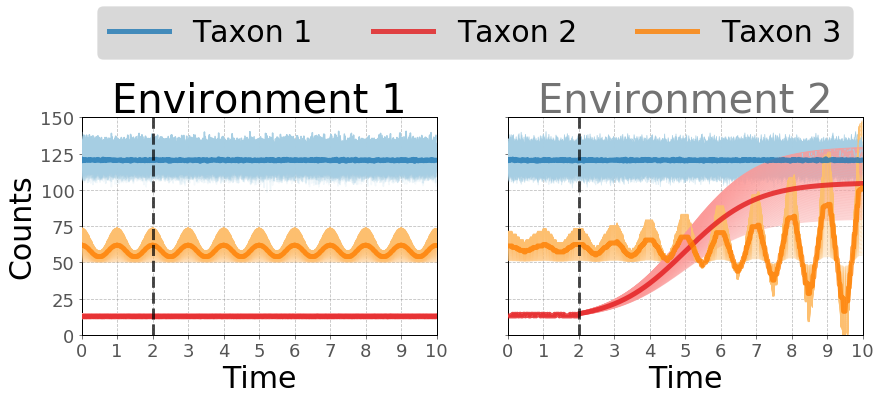

In [5]:
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4),sharey=True)

maxgrowth=100,
timestep=0.02
timemax=10.
time = np.arange(0,timemax,timestep)
time_sig = np.arange(-timemax//2,timemax//2,timestep)
n_samples = 100

#### env 1 ####
# random 
rndH = [i*(random_noise(time,maxgrowth)//2+60) for i in np.linspace(1,1.2,n_samples)]
# logrithm
sigpn = [(core(time)+2)*i for i in np.linspace(1,1.2,n_samples)]
# cos 
cosn = [i*cos_stable(time,40)+50 for i in np.linspace(0,.8,n_samples)]
#plot
order_=1
for p_c,p_l,p_r,alpha_c,alpha_l,alpha_r in zip(cosn,sigpn,rndH,
                                               np.linspace(.1,1,len(cosn)),
                                               np.linspace(.1,1,len(sigpn)),
                                               np.linspace(.1,1,len(rndH))):
    #plot in order (allow to interleave)
    ax1.plot(time,p_r,c='#a6cee3',alpha=alpha_r,zorder=order_)
    order_+=1
    ax1.plot(time,p_l,c='#fb9a99',alpha=alpha_l,zorder=order_)
    order_+=1
    ax1.plot(time,p_c,c='#fdbf6f',alpha=alpha_c,zorder=order_)
    order_+=1 
ax1.plot(time,np.array(rndH).mean(axis=0),c='#1f78b4',alpha=.8,lw=5,zorder=order_)
order_+=1
ax1.plot(time,np.array(sigpn).mean(axis=0),c='#e31a1c',alpha=.8,lw=5,zorder=order_)
order_+=1
ax1.plot(time,np.array(cosn).mean(axis=0),c='#ff7f00',alpha=.8,lw=5,zorder=order_)
order_+=1

ax1.axvline(2,lw=3,ls='--',c='black',alpha=.7,zorder=order_)
ax1.set_xlim(0,timemax)
ax1.set_ylim(0,150)
ax1.set_ylabel('Counts',fontsize=30,color='black')
ax1.set_xlabel('Time',fontsize=30,color='black')
ax1.set_title('Environment 1',fontsize=40,color='#000000')
xa = ax1.get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True))
ax1.set_facecolor('white')
ax1.grid(which='major', axis='both', linestyle='--', color='grey', alpha=.5)
for spine in ax1.spines.values():
        spine.set_edgecolor('black')
        
T_env1 = np.array([[t3,t2,t1] 
                   for t1,t2,t3 in zip(rndH,sigpn,cosn)])


#### env 2 ####
#random noise
rndH = [i*(random_noise(time,maxgrowth)//2+60) for i in np.linspace(1,1.2,n_samples)]
#cos 
cosn = [i*sin_decay(time,20,amp=.9)[::-1]+50 for i in np.linspace(.1,1.95,n_samples)]
# logrithm
sigpn = [np.array(list(sigpn[90][:list(time).index(2.)])+list((sigmoid(time_sig)*i)+10)[list(time).index(2.):])
         for i in np.linspace(int(n_samples//2+20),int(n_samples+20),100)]
#plot
order_=1
for p_c,p_l,p_r,alpha_c,alpha_l,alpha_r in zip(cosn,sigpn,rndH,
                                               np.linspace(.4,1,len(cosn)),
                                               np.linspace(.4,1,len(sigpn)),
                                               np.linspace(.4,1,len(rndH))):
    #plot in order (allow to interleave)
    ax2.plot(time,p_r,c='#a6cee3',alpha=alpha_r,zorder=order_,lw=.8)
    order_+=1
    ax2.plot(time,p_l,c='#fb9a99',alpha=alpha_l,zorder=order_,lw=.8)
    order_+=1
    ax2.plot(time,p_c,c='#fdbf6f',alpha=alpha_c,zorder=order_,lw=.8)
    order_+=1 
ax2.plot(time,np.array(rndH).mean(axis=0),c='#1f78b4',alpha=.8,lw=5,zorder=order_,label='Taxon 1')
order_+=1
ax2.plot(time,np.array(sigpn).mean(axis=0),c='#e31a1c',alpha=.8,lw=5,zorder=order_,label='Taxon 2')
order_+=1
ax2.plot(time,np.array(cosn).mean(axis=0),c='#ff7f00',alpha=.8,lw=5,zorder=order_,label='Taxon 3')
order_+=1
    
T_env2 = np.array([[t3,t2,t1] 
                   for t1,t2,t3 in zip(rndH,sigpn,cosn)])

ax2.axvline(2,lw=3,ls='--',c='black',alpha=.7,zorder=order_)  
ax2.set_xlim(0,timemax)
ax2.set_ylim(0,150)
#ax2.set_ylabel('Counts',fontsize=22)
ax2.set_xlabel('Time',fontsize=30,color='black')
ax2.set_title('Environment 2',fontsize=40,color='#737373')
ax2.set_facecolor('white')
ax2.grid(which='major', axis='both', 
         linestyle='--', color='grey', alpha=.5)
for spine in ax2.spines.values():
        spine.set_edgecolor('black')
        
xa = ax2.get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True))

ax2.legend(loc=2, bbox_to_anchor=(-1.2, 1.58),
           prop={'size':30},fancybox=True, 
           framealpha=0.3,ncol=4, 
           markerscale=50, facecolor="grey")

plt.savefig('figures/figure1A.png',dpi=300, 
            bbox_inches='tight',  transparent=True)
plt.show()


In [6]:
from gemelli.tensor_factorization import TenAls
from gemelli.tensor_preprocessing import table_to_tensor,tensor_rclr
from skbio import OrdinationResults, stats
from deicode.optspace import OptSpace
from deicode.preprocessing import rclr


In [7]:
# make toy tensor
Tensor = np.vstack([T_env1,T_env2])
Tensor[Tensor<0]=0
T_rclr = tensor_rclr(Tensor.copy())


In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors as colors
from matplotlib import cm
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [.05, 0.5, .95]
        return np.ma.masked_array(np.interp(value, x, y))

In [9]:
Tensor.shape

(200, 3, 500)

In [10]:
len(time)

500

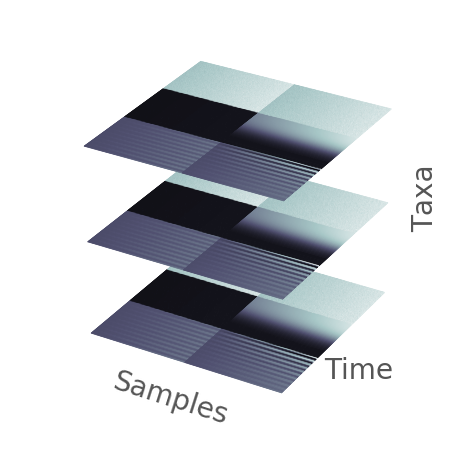

In [15]:
X = np.arange(Tensor.shape[0])[:, None, None]
Y = np.arange(Tensor.shape[2])[None, :, None]
Z = np.arange(Tensor.shape[1])[None, None, :]
x, y, z = np.broadcast_arrays(X, Y, Z)
X = x.ravel()
Y = y.ravel()
Z = z.ravel()
# Do the plotting in a single call.
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
p = ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           c=Tensor.ravel(),
           #norm=MidpointNormalize(midpoint=80.),
           cmap=plt.get_cmap('bone'),
               alpha=.9,s=.3) #RdBu_r
ax.set_xlabel('Samples', fontsize=28, labelpad=-10)
ax.set_zlabel('Taxa', fontsize=28, rotation=90, labelpad=-10)
ax.set_ylabel('Time', fontsize=28, labelpad=-10)
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# Get rid of the ticks                          
ax.set_xticks([])                               
ax.set_yticks([])                               
ax.set_zticks([])
#tick labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
#ax.tick_params(axis='y',which='both',color='white',width=0,length=0)
# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
#color bar
#cbar = fig.colorbar(p,shrink=.7,orientation='horizontal')
#cbar.ax.set_yticklabels(['Sample 1','','','...','','', '', 'Sample N']) 
#cbar.ax.set_ticks_position('left')
ax.set_facecolor('white')
#show
plt.savefig('figures/figure1B_nobar_bone_bar.png',dpi=300, 
            bbox_inches='tight',  transparent=True)
plt.show()


In [12]:
# take reduction 
TF = TenAls(rank=3).fit(T_rclr)
tload = pd.DataFrame(TF.time_loading)
tsamp = pd.DataFrame(TF.sample_loading)
tfeat = pd.DataFrame(TF.feature_loading)


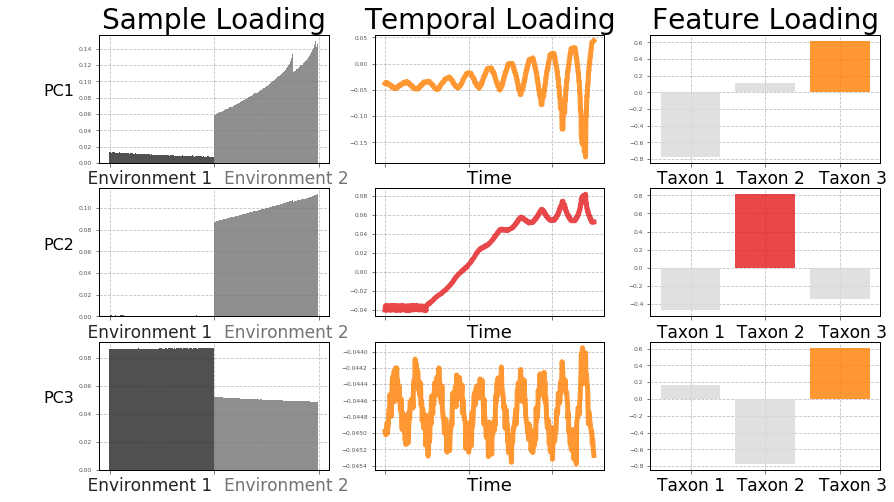

In [11]:
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

fig,axn = plt.subplots(3,3,figsize=(14,8))
i = 0
axn = axn.flat

color_sig = {0:'#ff7f00',1:'#e31a1c',2:'#ff7f00'}
colot_feat = {0:['#d9d9d9','#d9d9d9','#ff7f00'],
              1:['#d9d9d9','#e31a1c','#d9d9d9'],
              2:['#d9d9d9','#d9d9d9','#ff7f00']}
color_samp = ['#252525']*100 + ['#737373']*100

for pc in range(3):
                        
    ### samples ###
    axn[i].bar(tload.index.values,abs(tload[pc].values),width=1,
               color=color_samp,alpha=.8)
    axn[i].set_xticklabels(['','               Environment 1',
                            '                           Environment 2','',''],
                           fontsize=17)
    for xtick, color_ in zip(axn[i].get_xticklabels(), 
                            ['#252525','#252525','#737373',
                             '#737373','#737373']):
        xtick.set_color(color_)
    axn[i].set_ylabel('PC'+str(pc+1),fontsize=16,rotation=0,labelpad=20,color='black')
    axn[i].tick_params(axis='y', which='both', labelsize=6)
    if pc==0:
        axn[i].set_title('Sample Loading',fontsize=28)
    axn[i].set_facecolor('white')
    axn[i].grid(which='major', axis='both', 
             linestyle='--', color='grey', alpha=.5)
    for spine in axn[i].spines.values():
            spine.set_edgecolor('black')    
    i+=1
    
    ### time ###
    axn[i].plot(tsamp.index.values,tsamp[pc].values,c=color_sig[pc],alpha=.8,lw=5)
    axn[i].set_xticklabels([])
    axn[i].set_xlabel('Time',fontsize=18,labelpad=0,color='black')
    axn[i].tick_params(axis='y', which='both', labelsize=6)
    if pc==0:
        axn[i].set_title('Temporal Loading',fontsize=28)
    axn[i].set_facecolor('white')
    axn[i].grid(which='major', axis='both', 
             linestyle='--', color='grey', alpha=.5)
    for spine in axn[i].spines.values():
            spine.set_edgecolor('black')
    i+=1
    
    ### features ###
    if pc!=2:
        axn[i].bar(tfeat.index.values,tfeat[pc].values*-1,
                   color=colot_feat[pc],alpha=.8)
    else:
        axn[i].bar(tfeat.index.values,tfeat[pc].values,
                   color=colot_feat[pc],alpha=.8)        
    axn[i].set_xticklabels(['','Taxon 1','  Taxon 2','     Taxon 3',''],
                           fontsize=17,color='black')
    axn[i].tick_params(axis='y', which='both', labelsize=6)
    if pc==0:
        axn[i].set_title('Feature Loading',fontsize=28)
    axn[i].set_facecolor('white')
    axn[i].grid(which='major', axis='both', 
             linestyle='--', color='grey', alpha=.5)
    for spine in axn[i].spines.values():
            spine.set_edgecolor('black')
    i+=1

plt.savefig('figures/figure1C_loadings.png',dpi=300, 
            bbox_inches='tight',  transparent=True)
plt.show()


